## Notebook for the Epithelial Reference Map preparation

- **Developed by**: Anna Maguza
- **Institute of Computational Biology - Computational Health Centre - Helmholtz Munich**
- 17th February 2023

### Import required moduls

In [1]:
import scanpy as sc

In [2]:
import numpy as np
import anndata as ad
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from geosketch import gs

In [3]:
from matplotlib import axes
from matplotlib import pylab

#### Setup Cells

In [4]:
%matplotlib inline

In [5]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi = 160, color_map = 'magma_r', dpi_save = 300, vector_friendly = True)

/Users/anna.maguza/miniconda3/envs/geosketch_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.3 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.2.2 statsmodels==0.13.5 pynndescent==0.5.8


### Upload data

In [6]:
# Downloading the data - cluster path
input = '/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/Reference_maps/GCA_Stem_cells/GCA_and_StemCells_initial/Reference_map_(Gut_cell_atlas+Smilie+Wang).h5ad'
output = '/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/Reference_maps/GCA_Stem_cells/GCA_and_StemCells_initial/Reference_map_(Gut_cell_atlas+Smilie+Wang)_output.h5ad'

In [ ]:
# Downloading the data - local machine path
input = '/Users/anna.maguza/Desktop/Data/Processed_datasets/Healthy_reference/GCA_Smillie_Wang_unprocessed/Reference_map_(Gut_cell_atlas+Smilie+Wang).h5ad'
output = '/Users/anna.maguza/Desktop/Data/Processed_datasets/Healthy_reference/GCA_Smillie_Wang_unprocessed/Reference_map_(Gut_cell_atlas+Smilie+Wang)_output.h5ad'

In [7]:
#Anndata upload
anndata = sc.read_h5ad(input)
anndata.X

<375293x40144 sparse matrix of type '<class 'numpy.float32'>'
	with 649526885 stored elements in Compressed Sparse Row format>

### Step 1 - create a proportion graph for cell types

In [8]:
#Rename 'nan' in 'Diagnosis' column to 'healthy'
anndata.obs['Diagnosis'] = anndata.obs['Diagnosis'].replace('nan', 'Healthy adult')
anndata.obs['Diagnosis'] = anndata.obs['Diagnosis'].replace('Healthy', 'Healthy adult')

In [9]:
#Filter epithelial cells and stem cells
#Extract Healthy adult and non-inflamed data in anndata_adult object
cells_to_keep = ["Stem Cell", "Epithelial"]
epithelial_cells = anndata.obs['CellType'].isin(cells_to_keep)
epithelial_cells = anndata[epithelial_cells, :].copy()


In [10]:
epithelial_cells.obs['Diagnosis'].value_counts()

Healthy adult        77527
fetal                46023
Pediatric healthy     7857
Non-inflamed          1030
Name: Diagnosis, dtype: int64

In [11]:
epithelial_cells.obs['CellType'].value_counts()

Epithelial    129929
Stem Cell       2508
Name: CellType, dtype: int64

In [12]:
epithelial_cells.obs['Cell States'].value_counts()

TA                       47700
Enterocyte               32745
Colonocyte               13729
Proximal progenitor       8580
Stem_Cells_GCA            6909
BEST4+ epithelial         4400
Goblet cell               3965
BEST2+ Goblet cell        2925
Paneth                    2911
Distal progenitor         2775
Stem_Cells_ext            2508
Tuft                       688
Microfold cell             430
EC cells (TAC1+)           387
EECs                       371
Progenitor (NEUROG3+)      292
M/X cells (MLN/GHRL+)      268
CLDN10+ cells              223
I cells (CCK+)             198
D cells (SST+)             132
L cells (PYY+)             104
K cells (GIP+)              77
EC cells (NPW+)             57
N cells (NTS+)              32
β cells (INS+)              29
Germ                         2
Name: Cell States, dtype: int64

In [13]:
epithelial_cells.obs['Cell States'].value_counts()

TA                       47700
Enterocyte               32745
Colonocyte               13729
Proximal progenitor       8580
Stem_Cells_GCA            6909
BEST4+ epithelial         4400
Goblet cell               3965
BEST2+ Goblet cell        2925
Paneth                    2911
Distal progenitor         2775
Stem_Cells_ext            2508
Tuft                       688
Microfold cell             430
EC cells (TAC1+)           387
EECs                       371
Progenitor (NEUROG3+)      292
M/X cells (MLN/GHRL+)      268
CLDN10+ cells              223
I cells (CCK+)             198
D cells (SST+)             132
L cells (PYY+)             104
K cells (GIP+)              77
EC cells (NPW+)             57
N cells (NTS+)              32
β cells (INS+)              29
Germ                         2
Name: Cell States, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, 'TA'),
  Text(1, 0, 'Enterocyte'),
  Text(2, 0, 'Colonocyte'),
  Text(3, 0, 'Proximal progenitor'),
  Text(4, 0, 'Stem_Cells_GCA'),
  Text(5, 0, 'BEST4+ epithelial'),
  Text(6, 0, 'Goblet cell'),
  Text(7, 0, 'BEST2+ Goblet cell'),
  Text(8, 0, 'Paneth'),
  Text(9, 0, 'Distal progenitor'),
  Text(10, 0, 'Stem_Cells_ext'),
  Text(11, 0, 'Tuft'),
  Text(12, 0, 'Microfold cell'),
  Text(13, 0, 'EC cells (TAC1+)'),
  Text(14, 0, 'EECs'),
  Text(15, 0, 'Progenitor (NEUROG3+)'),
  Text(16, 0, 'M/X cells (MLN/GHRL+)'),
  Text(17, 0, 'CLDN10+ cells'),
  Text(18, 0, 'I cells (CCK+)'),
  Text(19, 0, 'D cells (SST+)'),
  Text(20, 0, 'L cells (PYY+)'),
  Text(21, 0, 'K cells (GIP+)'),
  Text(22, 0, 'EC cells (NPW+)'),
  Text(23, 0, 'N cells (NTS+)'),
  Text(24, 0, 'β cells (INS+)'),
  Text(25, 0, 'Germ')])

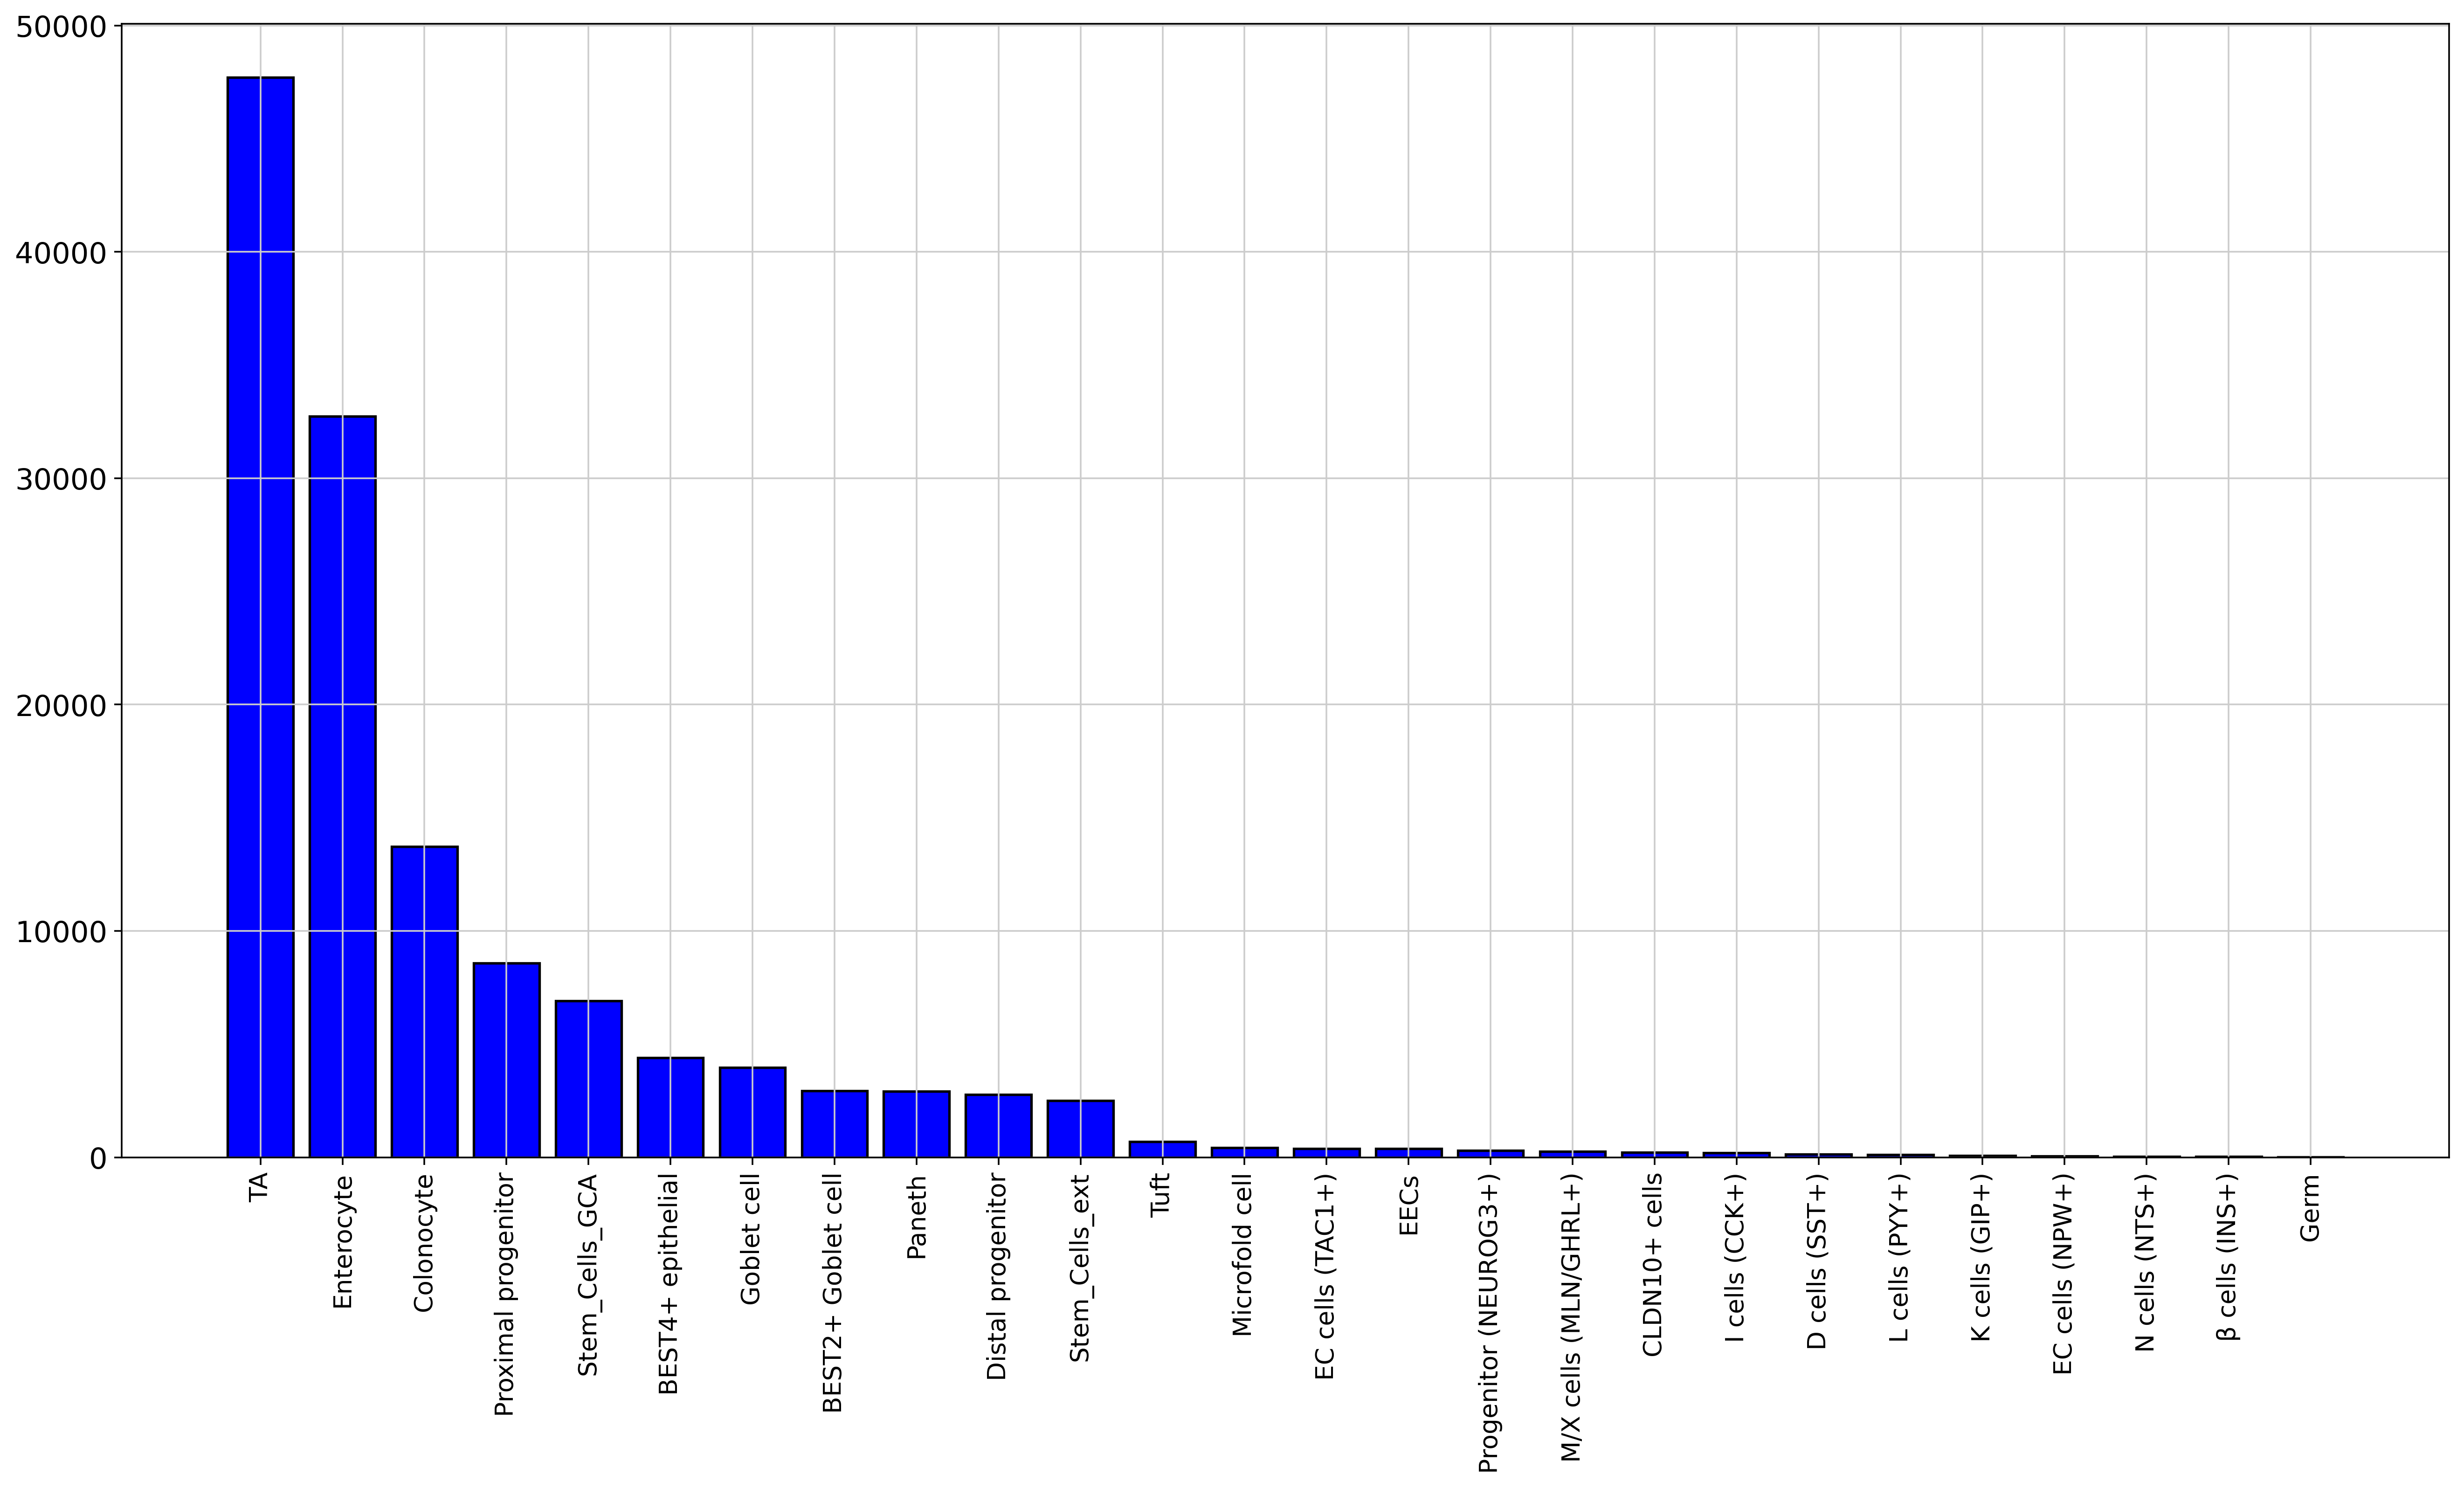

In [14]:
#Create a barplot of the number of cells per cell type in the epithelial_cells_fetal object
plt.figure(figsize = (20, 10))
plt.bar(epithelial_cells.obs["Cell States"].value_counts().index, epithelial_cells.obs["Cell States"].value_counts(), color = "blue", edgecolor = "black", linewidth = 1.2)
matplotlib.pyplot.xticks(rotation = 90, fontsize = 12)

In [14]:
#Combine I cells (CCK+), D cells (SST+), L cells (PYY+), K cells (GIP+), EC cells (NPW+), β cells (INS+) and N cells (NTS+) into one category "rare enteroendocrine cells"
enteroendocrine = ["I cells (CCK+)", "D cells (SST+)", "L cells (PYY+)", "K cells (GIP+)", "EC cells (NPW+)", "β cells (INS+)", "N cells (NTS+)"]
epithelial_cells.obs['Cell States'] = epithelial_cells.obs['Cell States'].replace(enteroendocrine, 'Minor_enteroendocrine_cells')

In [15]:
epithelial_cells.obs['Cell States'].value_counts()

TA                             47700
Enterocyte                     32745
Colonocyte                     13729
Proximal progenitor             8580
Stem_Cells_GCA                  6909
BEST4+ epithelial               4400
Goblet cell                     3965
BEST2+ Goblet cell              2925
Paneth                          2911
Distal progenitor               2775
Stem_Cells_ext                  2508
Tuft                             688
Minor_enteroendocrine_cells      629
Microfold cell                   430
EC cells (TAC1+)                 387
EECs                             371
Progenitor (NEUROG3+)            292
M/X cells (MLN/GHRL+)            268
CLDN10+ cells                    223
Germ                               2
Name: Cell States, dtype: int64

In [16]:
#Delete Germ cells 
epithelial_cells = epithelial_cells[~epithelial_cells.obs['Cell States'].isin(['Germ']), :]

In [17]:
epithelial_cells.obs['Cell States'].value_counts()

TA                             47700
Enterocyte                     32745
Colonocyte                     13729
Proximal progenitor             8580
Stem_Cells_GCA                  6909
BEST4+ epithelial               4400
Goblet cell                     3965
BEST2+ Goblet cell              2925
Paneth                          2911
Distal progenitor               2775
Stem_Cells_ext                  2508
Tuft                             688
Minor_enteroendocrine_cells      629
Microfold cell                   430
EC cells (TAC1+)                 387
EECs                             371
Progenitor (NEUROG3+)            292
M/X cells (MLN/GHRL+)            268
CLDN10+ cells                    223
Name: Cell States, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'TA'),
  Text(1, 0, 'Enterocyte'),
  Text(2, 0, 'Colonocyte'),
  Text(3, 0, 'Proximal progenitor'),
  Text(4, 0, 'Stem_Cells_GCA'),
  Text(5, 0, 'BEST4+ epithelial'),
  Text(6, 0, 'Goblet cell'),
  Text(7, 0, 'BEST2+ Goblet cell'),
  Text(8, 0, 'Paneth'),
  Text(9, 0, 'Distal progenitor'),
  Text(10, 0, 'Stem_Cells_ext'),
  Text(11, 0, 'Tuft'),
  Text(12, 0, 'Minor_enteroendocrine_cells'),
  Text(13, 0, 'Microfold cell'),
  Text(14, 0, 'EC cells (TAC1+)'),
  Text(15, 0, 'EECs'),
  Text(16, 0, 'Progenitor (NEUROG3+)'),
  Text(17, 0, 'M/X cells (MLN/GHRL+)'),
  Text(18, 0, 'CLDN10+ cells')])

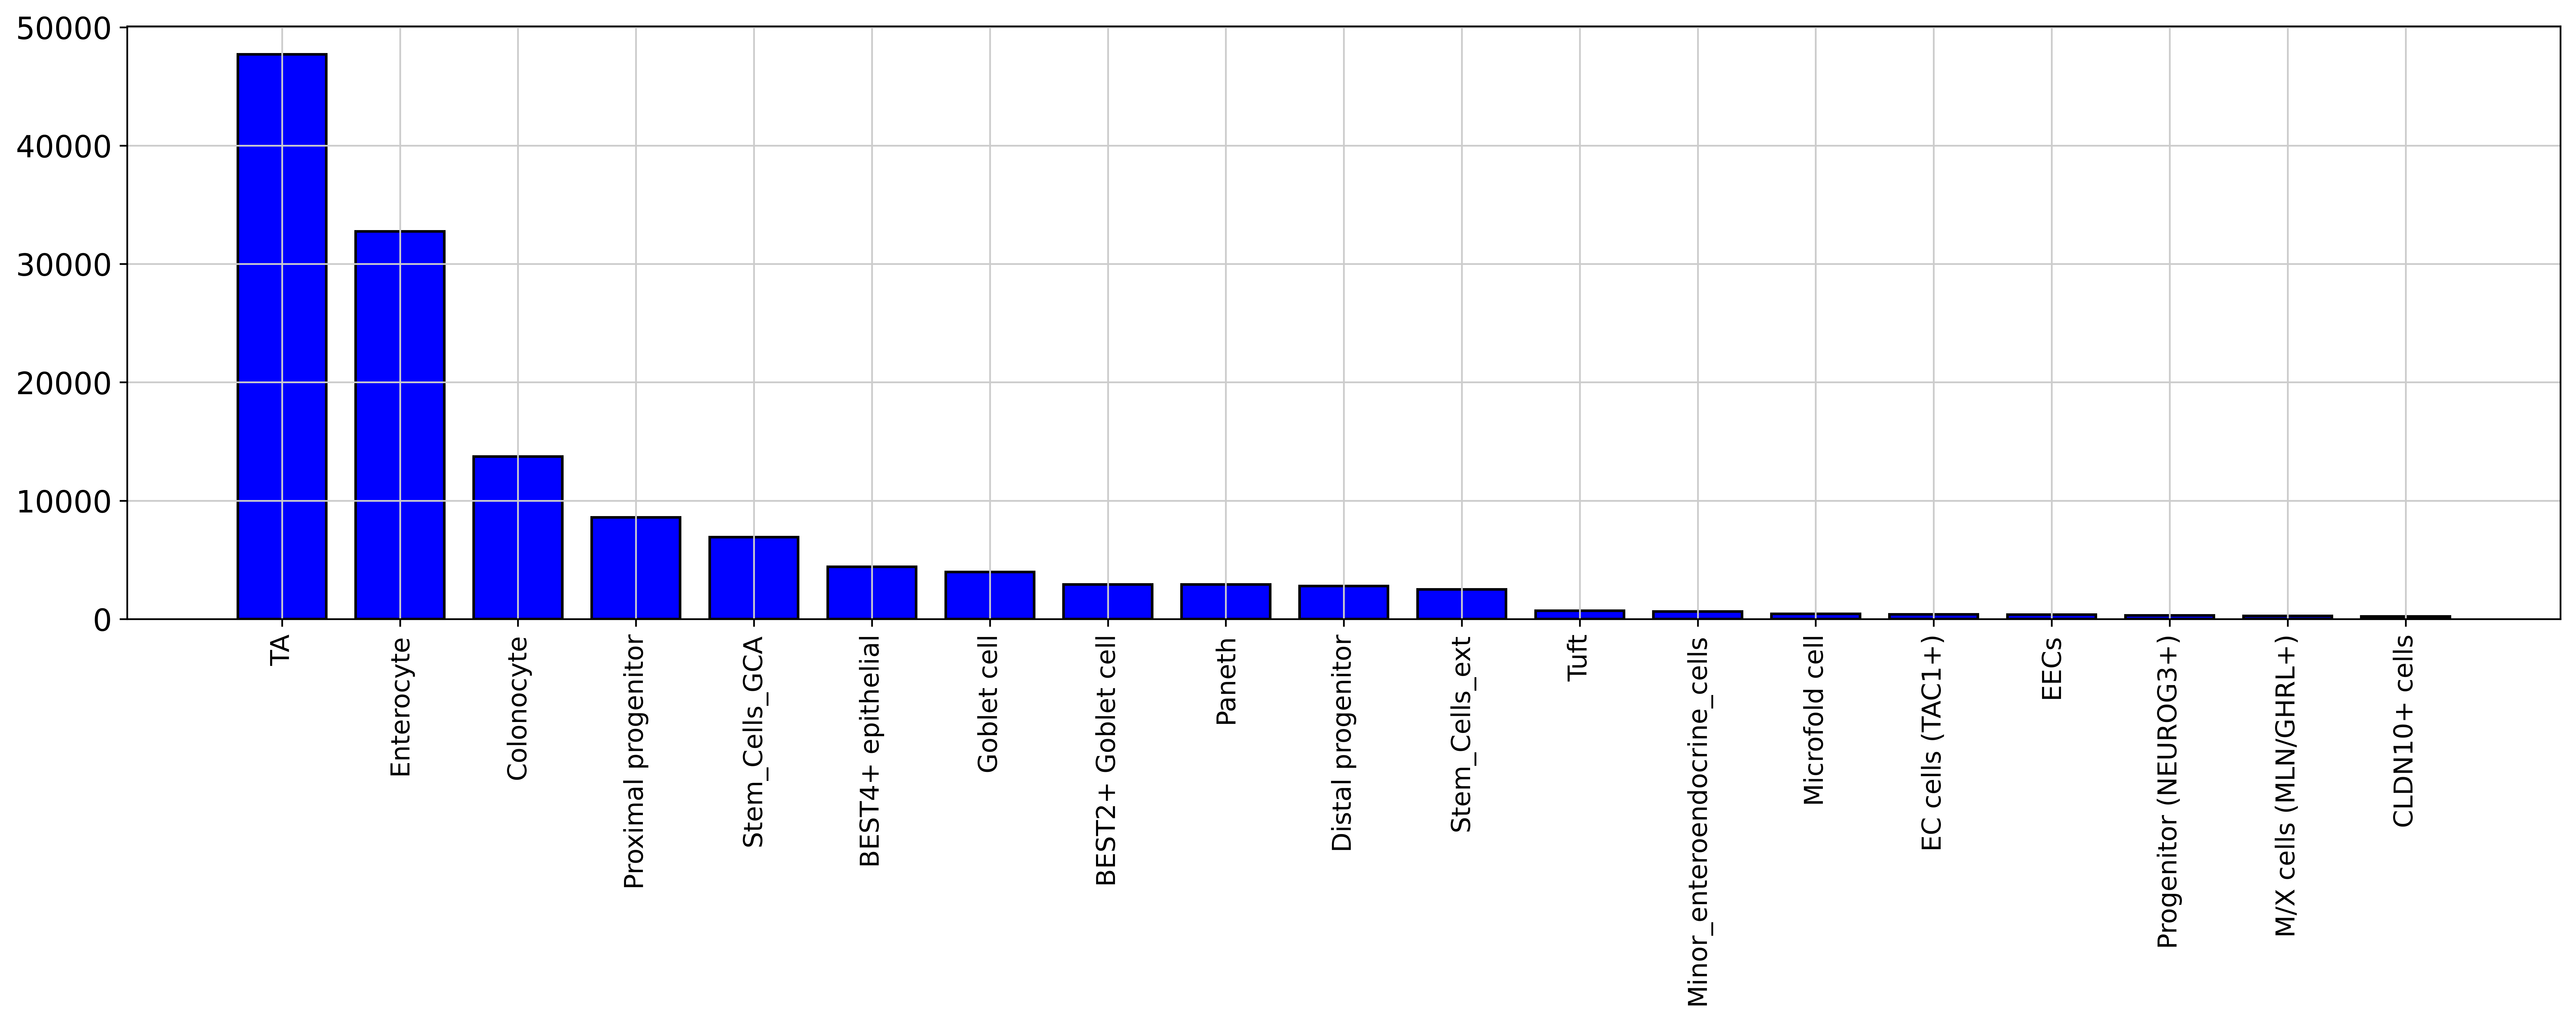

In [19]:
#Create a barplot of the number of cells per cell type in the epithelial_cells_fetal object
plt.figure(figsize = (20, 5), dpi = 300)
plt.bar(epithelial_cells.obs["Cell States"].value_counts().index, epithelial_cells.obs["Cell States"].value_counts(), color = "blue", edgecolor = "black", linewidth = 1.2, width = 0.75)
matplotlib.pyplot.xticks(rotation = 90, fontsize = 12)

### Subset data with `geosketch`

In [18]:
#Extract epithelial and plasma cells from the anndata_adult object
TA = epithelial_cells[epithelial_cells.obs["Cell States"].isin(['TA']), :]
Enterocyte = epithelial_cells[epithelial_cells.obs["Cell States"].isin(['Enterocyte']), :]
Colonocyte = epithelial_cells[epithelial_cells.obs["Cell States"].isin(['Colonocyte']), :]
Stem = epithelial_cells[epithelial_cells.obs["Cell States"].isin(['Stem_Cells_GCA']), :]

In [19]:
sc.pp.pca(TA)
sc.pp.pca(Enterocyte)

computing PCA
    with n_comps=50
    finished (0:00:20)
computing PCA
    with n_comps=50
    finished (0:00:38)


In [20]:
sc.pp.pca(Colonocyte)

computing PCA
    with n_comps=50
    finished (0:00:14)


In [21]:
sc.pp.pca(Stem)

computing PCA
    with n_comps=50
    finished (0:00:10)


In [22]:
N = 10000

In [23]:
sketch_index_TA = gs(TA.obsm['X_pca'], N, replace = False)
sketch_index_Enterocyte = gs(Enterocyte.obsm['X_pca'], N, replace = False)
sketch_index_Colonocyte = gs(Colonocyte.obsm['X_pca'], N, replace = False)
sketch_index_Stem = gs(Stem.obsm['X_pca'], 2508, replace = False)

In [24]:
N = 2508
sketch_index_Stem = gs(Stem.obsm['X_pca'], N, replace = False)

In [25]:
#Subset cells according to the sketch index
subset_TA = TA[TA.obs_names[sketch_index_TA]]
subset_Enterocyte = Enterocyte[Enterocyte.obs_names[sketch_index_Enterocyte]]
subset_Colonocyte = Colonocyte[Colonocyte.obs_names[sketch_index_Colonocyte]]
subset_Stem = Stem[Stem.obs_names[sketch_index_Stem]]

In [26]:
# Drop TA, Enterocyte and Plasma cells from the anndata_adult object
epithelial_cells_subset = epithelial_cells[~epithelial_cells.obs['Cell States'].isin(['TA', 'Enterocyte', 'Colonocyte', 'Stem_Cells_GCA']), :]

In [27]:
# Concatenate the subset of TA, Enterocyte and Colonocyte cells with the epithelial_cells_subset
epithelial_cells_subset = ad.concat([epithelial_cells_subset, subset_TA, subset_Enterocyte, subset_Colonocyte, subset_Stem])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Colonocyte'),
  Text(1, 0, 'Enterocyte'),
  Text(2, 0, 'TA'),
  Text(3, 0, 'Proximal progenitor'),
  Text(4, 0, 'BEST4+ epithelial'),
  Text(5, 0, 'Goblet cell'),
  Text(6, 0, 'BEST2+ Goblet cell'),
  Text(7, 0, 'Paneth'),
  Text(8, 0, 'Distal progenitor'),
  Text(9, 0, 'Stem_Cells_ext'),
  Text(10, 0, 'Stem_Cells_GCA'),
  Text(11, 0, 'Tuft'),
  Text(12, 0, 'Minor_enteroendocrine_cells'),
  Text(13, 0, 'Microfold cell'),
  Text(14, 0, 'EC cells (TAC1+)'),
  Text(15, 0, 'EECs'),
  Text(16, 0, 'Progenitor (NEUROG3+)'),
  Text(17, 0, 'M/X cells (MLN/GHRL+)'),
  Text(18, 0, 'CLDN10+ cells')])

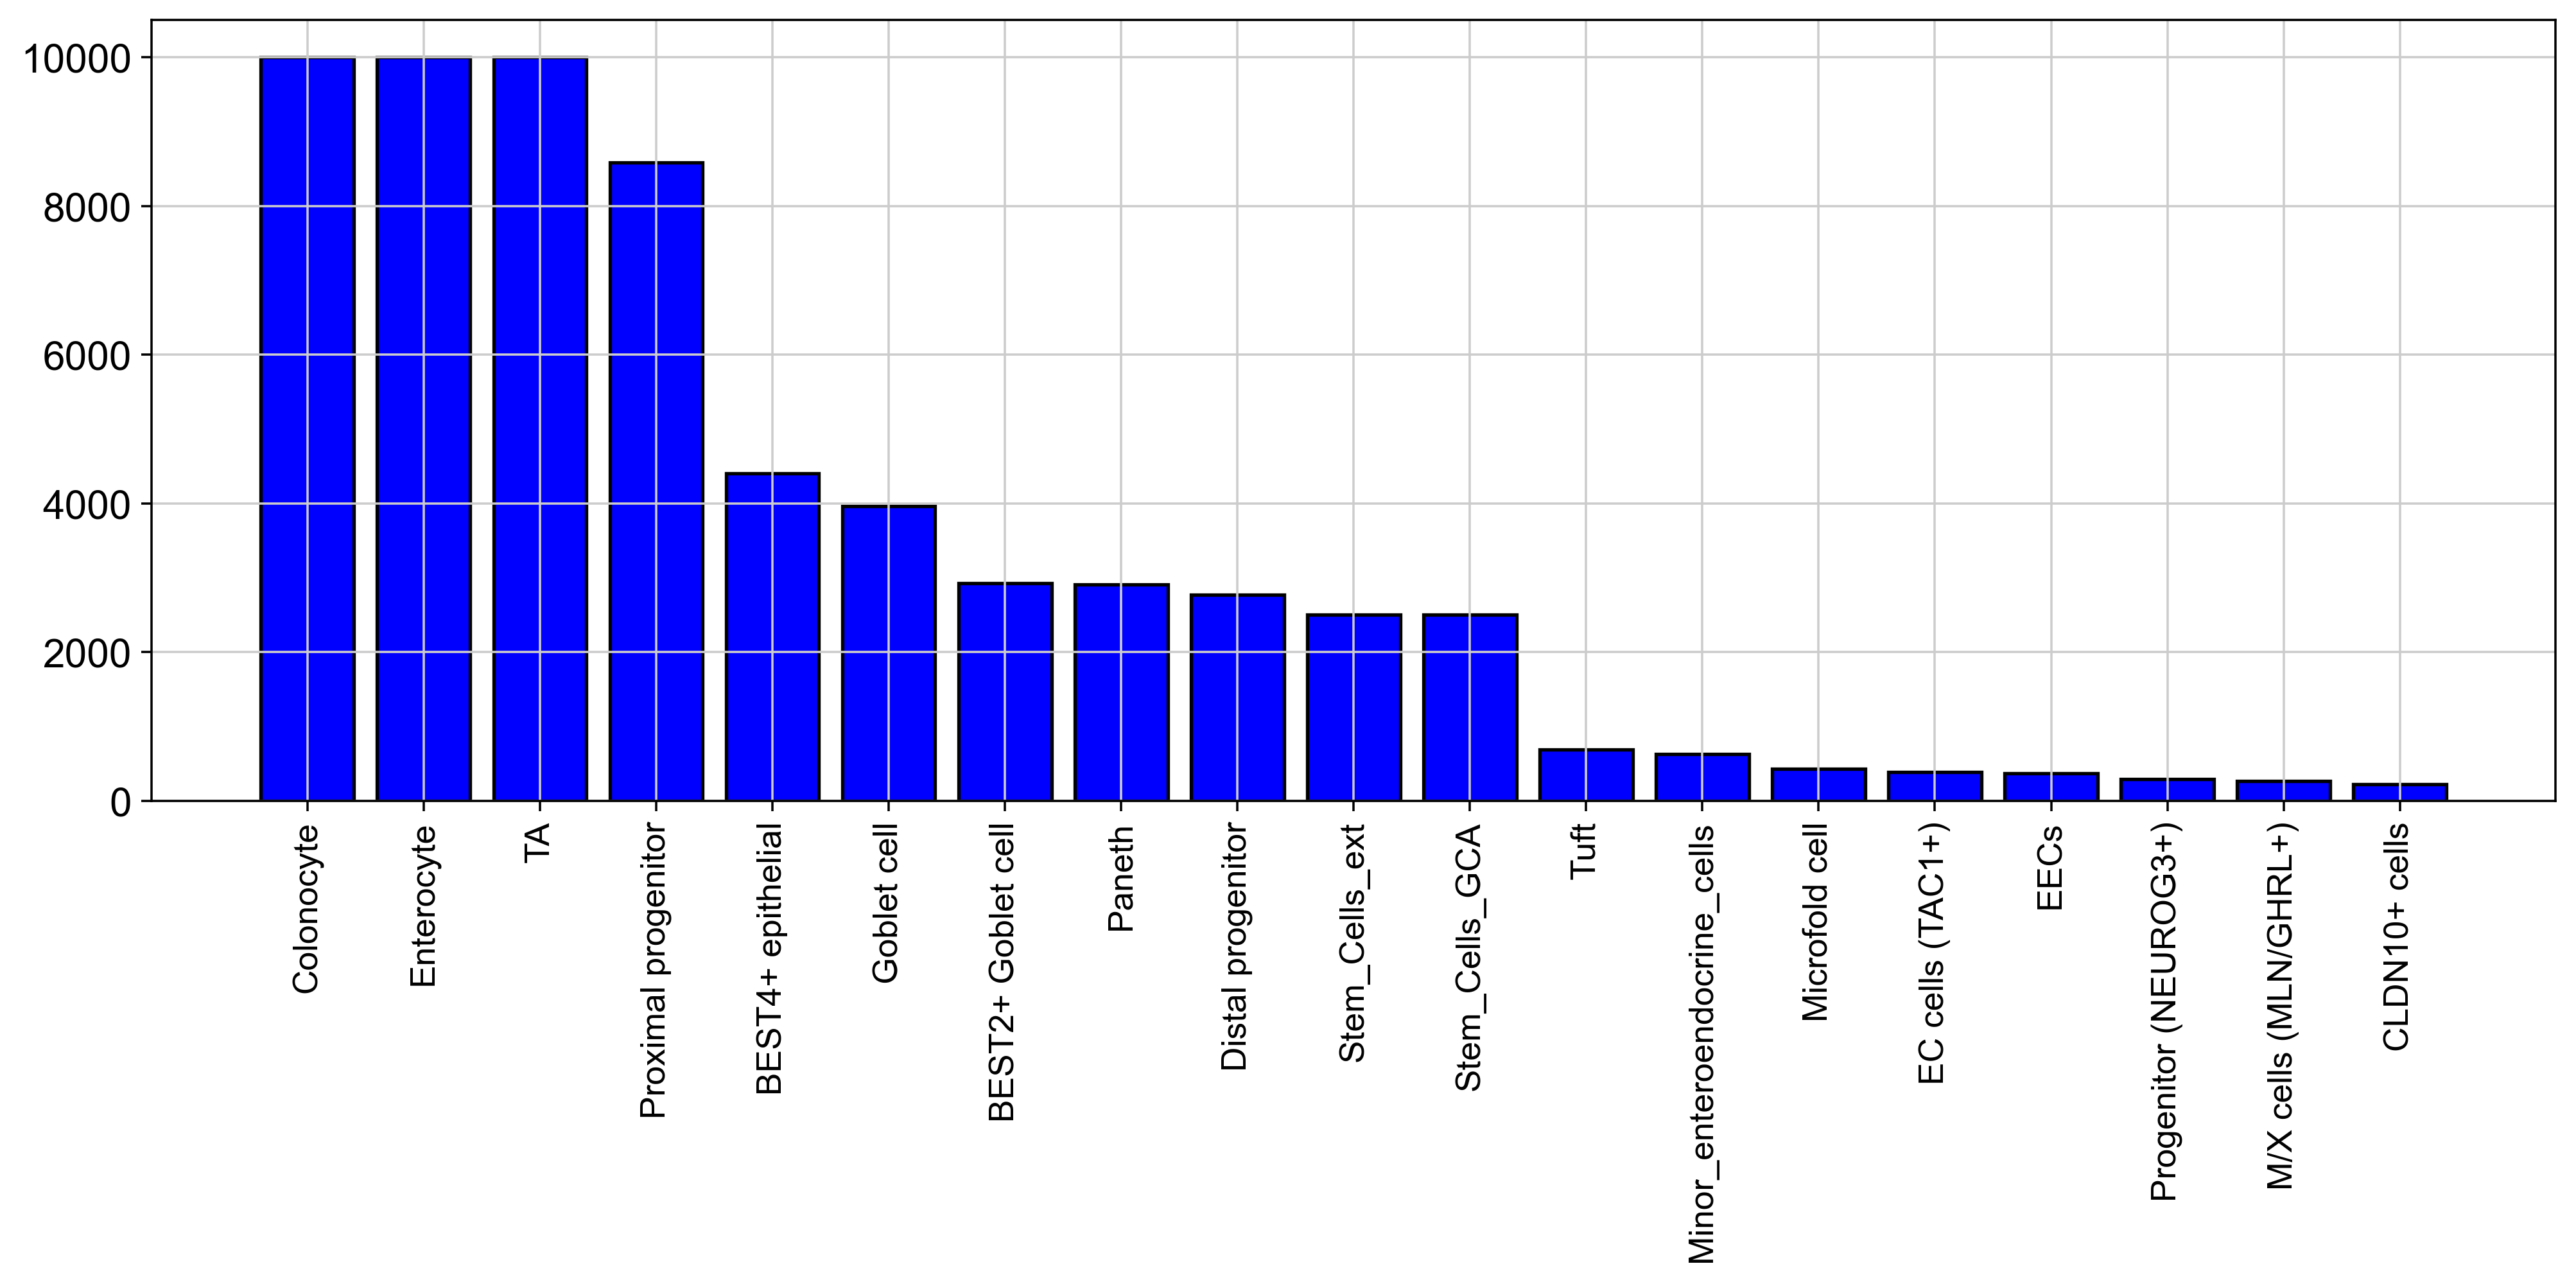

In [28]:
#Create a barplot of the number of cells per cell type in the anndata_pediatric object
plt.figure(figsize = (15, 5))
plt.bar(epithelial_cells_subset.obs["Cell States"].value_counts().index, epithelial_cells_subset.obs["Cell States"].value_counts(), color = "blue", edgecolor = "black", linewidth = 1.2)
matplotlib.pyplot.xticks(rotation = 90, fontsize = 12)

In [29]:
#Save the anndata_subset object - cluster path
epithelial_cells_subset.write('/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/Reference_maps/GCA_Stem_cells/Epithelial_cells/Geosketch_subset/Epithelial_cells_Geosketch_subset_reference.h5ad')

In [ ]:
#Save the anndata_subset object - local machine path
epithelial_cells_subset.write('/Users/anna.maguza/Desktop/Data/Processed_datasets/Geosketch_subsets/Epithelial_cells/Epithelial_cells_Geosketch_subset_reference.h5ad')

In [30]:
#Drop the anndata_subset object from the anndata object 
query_object = epithelial_cells[~epithelial_cells.obs_names.isin(epithelial_cells_subset.obs_names), :]

([0, 1, 2, 3],
 [Text(0, 0, 'TA'),
  Text(1, 0, 'Enterocyte'),
  Text(2, 0, 'Stem_Cells_GCA'),
  Text(3, 0, 'Colonocyte')])

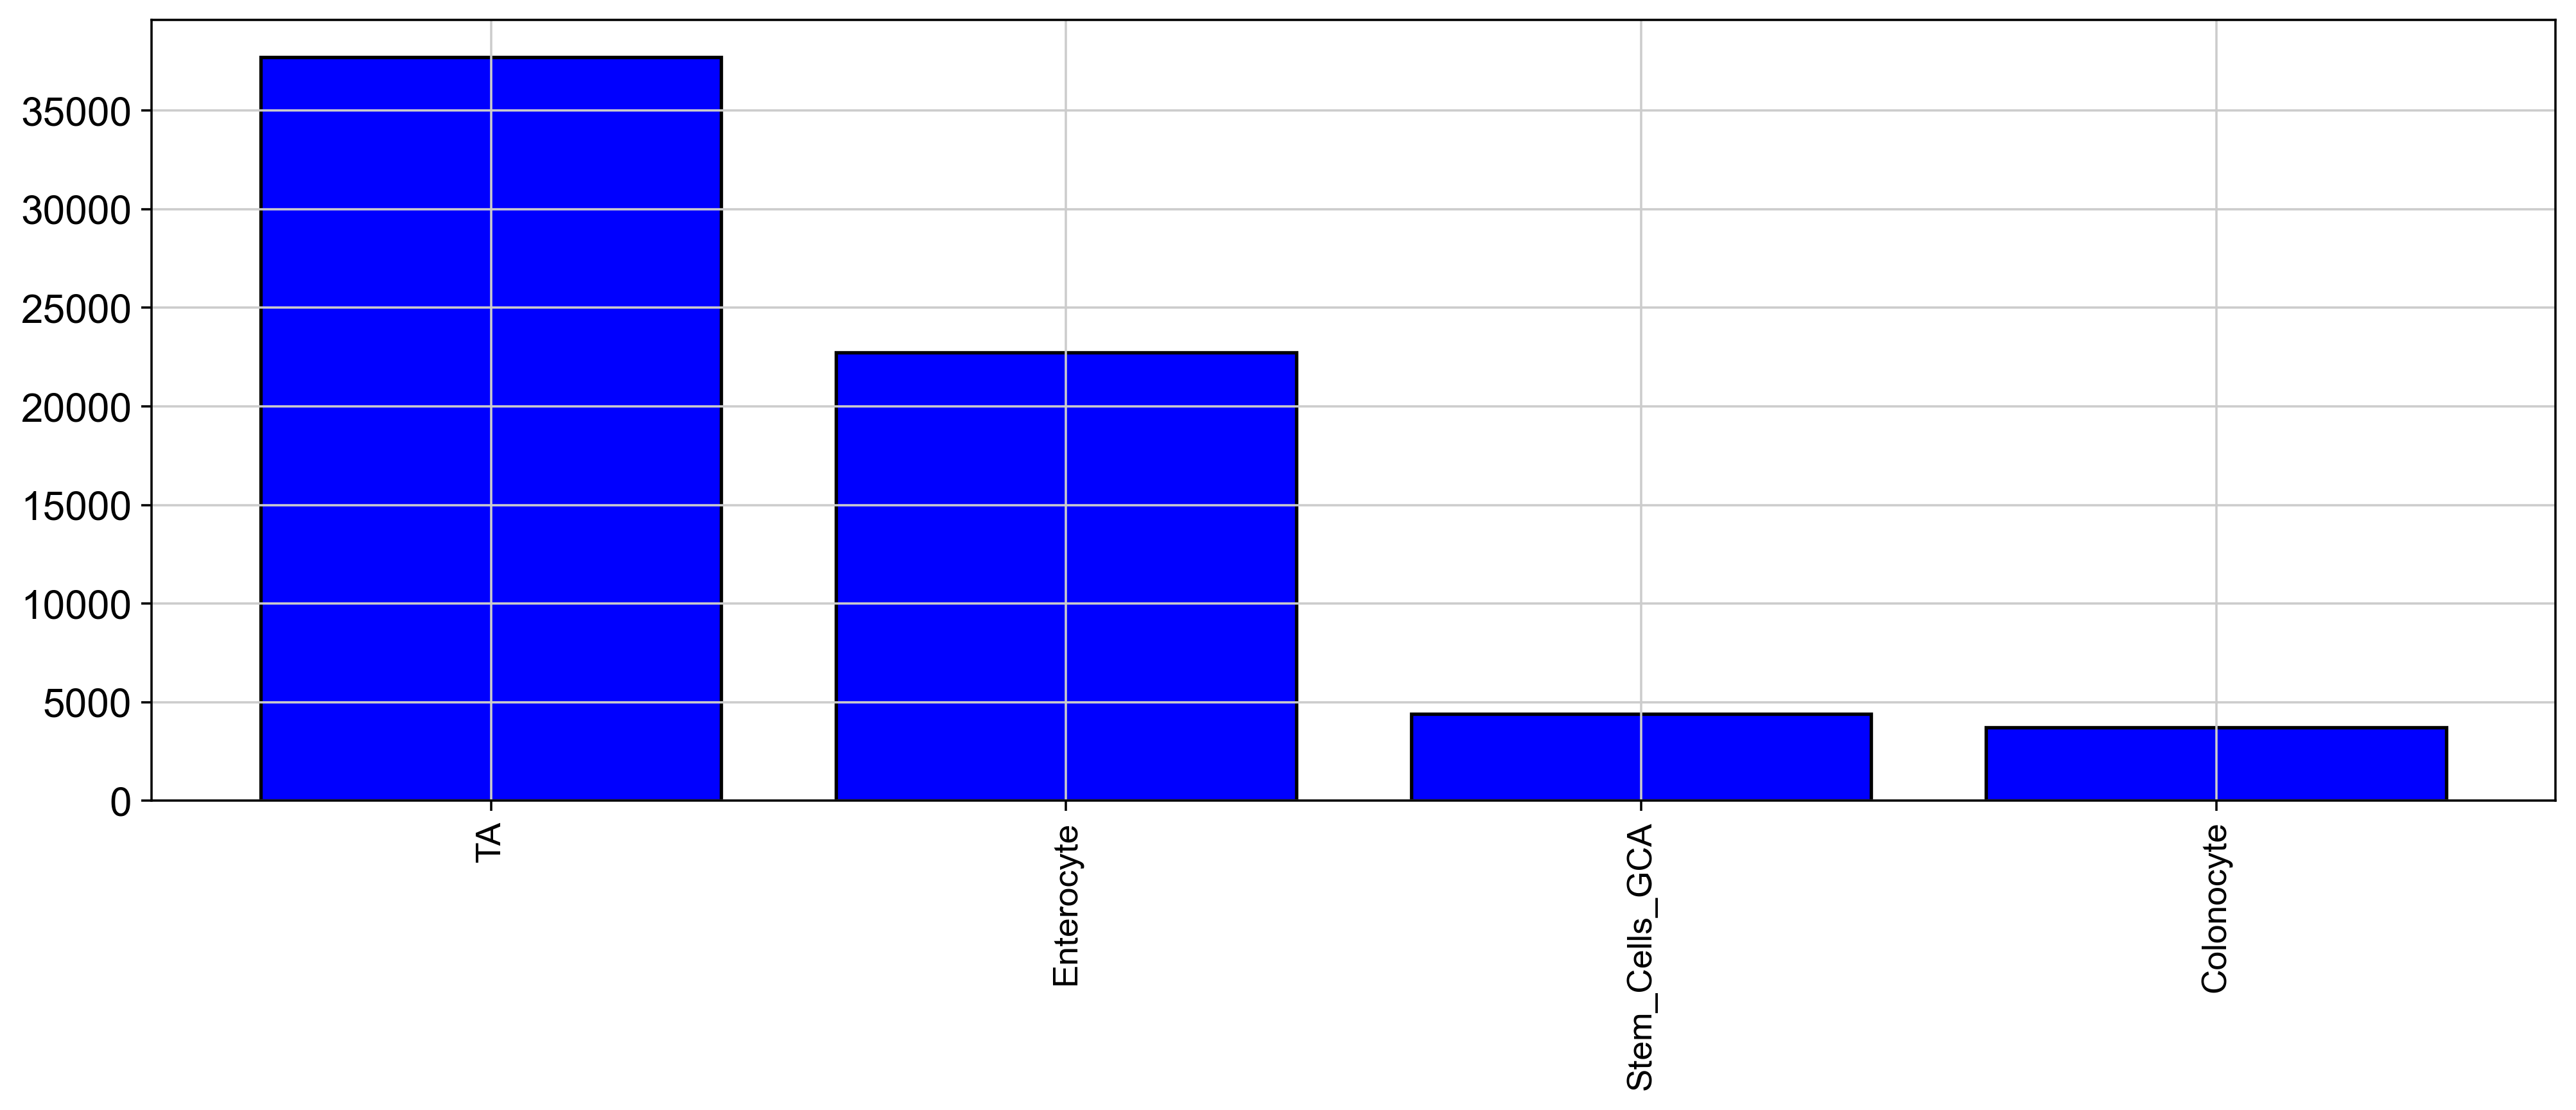

In [31]:
#Create a barplot of the number of cells per cell type in the anndata_pediatric object
plt.figure(figsize = (15, 5))
plt.bar(query_object.obs['Cell States'].value_counts().index, query_object.obs["Cell States"].value_counts(), color = "blue", edgecolor = "black", linewidth = 1.2)
matplotlib.pyplot.xticks(rotation = 90, fontsize = 12)

In [40]:
#Save the query_object object
query_object.write('/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/Reference_maps/GCA_Stem_cells/Epithelial_cells/Geosketch_subset/Epithelial_cells_Geosketch_subset_query.h5ad')

In [ ]:
#Save the query_object object - local machine path
query_object.write('/Users/anna.maguza/Desktop/Data/Processed_datasets/Geosketch_subsets/Epithelial_cells/Epithelial_cells_Geosketch_subset_query.h5ad')